<a href="https://colab.research.google.com/github/PengZhang1997/Peng_INFO5731_Spring2025/blob/main/ZhangPeng_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 2**

In this assignment, you will work on gathering text data from an open data source via web scraping or API. Following this, you will need to clean the text data and perform syntactic analysis on the data. Follow the instructions carefully and design well-structured Python programs to address each question.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

* **Make sure to submit the cleaned data CSV in the comment section - 10 points**

**Total points**: 100

**Deadline**: Monday, at 11:59 PM.

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**

**Please check that the link you submitted can be opened and points to the correct assignment.**


# Question 1 (25 points)

Write a python program to collect text data from **either of the following sources** and save the data into a **csv file:**

(1) Collect all the customer reviews of a product (you can choose any porduct) on amazon. [atleast 1000 reviews]

(2) Collect the top 1000 User Reviews of a movie recently in 2023 or 2024 (you can choose any movie) from IMDB. [If one movie doesn't have sufficient reviews, collect reviews of atleast 2 or 3 movies]


(3) Collect the **abstracts** of the top 10000 research papers by using the query "machine learning", "data science", "artifical intelligence", or "information extraction" from Semantic Scholar.

(4) Collect all the information of the 904 narrators in the Densho Digital Repository.

(5)**Collect a total of 10000 reviews** of the top 100 most popular software from G2 and Capterra.


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import time

def fetch_reviews(movie_id, max_reviews=1000):
    reviews = []
    page = 1
    while len(reviews) < max_reviews:
        # Construct the pagination URL
        url = f"https://www.imdb.com/title/{movie_id}/reviews?ref_=tt_ov_ql_2&page={page}"
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
        }

        # Send request to the page
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to retrieve page {page} for {movie_id}")
            break

        # Parse the HTML
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all review elements
        review_elements = soup.find_all('div', class_='ipc-html-content-inner-div')

        if not review_elements:
            print(f"No more reviews found for {movie_id}.")
            break

        for review in review_elements:
            reviews.append(review.get_text(strip=True))

        # Check if the desired number of reviews is reached
        if len(reviews) >= max_reviews:
            break

        time.sleep(2)  # Add delay to avoid making too frequent requests
        page += 1

    print(f"Total reviews collected: {len(reviews)}")  # Print the total number of reviews
    return reviews[:max_reviews]

def save_reviews_to_csv(reviews, filename="Peng.movie_review.csv"):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Review"])  # Write the header
        for review in reviews:
            writer.writerow([review])
    print(f"Reviews saved to {filename}")

# Fetch reviews for the specified movie
movie_id = "tt13521006"
reviews = fetch_reviews(movie_id, max_reviews=1000)

# Save the reviews to a CSV file
save_reviews_to_csv(reviews)

# Download the CSV file
from google.colab import files
files.download('Peng.movie_review.csv')



Total reviews collected: 1008
Reviews saved to Peng.movie_review.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Question 2 (15 points)

Write a python program to **clean the text data** you collected in the previous question and save the clean data in a new column in the csv file. The data cleaning steps include: [Code and output is required for each part]

(1) Remove noise, such as special characters and punctuations.

(2) Remove numbers.

(3) Remove stopwords by using the stopwords list.

(4) Lowercase all texts

(5) Stemming.

(6) Lemmatization.

In [ ]:
!pip install nltk  # Execute this command only once

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download necessary resources from NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load the CSV file (this is the movie review data you have scraped)
df = pd.read_csv('Peng.movie_review.csv')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# List of stopwords
stop_words = set(stopwords.words('english'))

# Data cleaning function
def clean_text(text):
    # (1) Remove noise (special characters and punctuation)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Only keep letters and spaces

    # (2) Remove digits
    text = re.sub(r'\d+', '', text)  # Remove numbers

    # (3) Remove stopwords
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]

    # (4) Convert to lowercase
    text = ' '.join(words).lower()

    # (5) Stem the words
    words = text.split()
    words = [stemmer.stem(word) for word in words]  # Stemming

    # (6) Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization

    return ' '.join(words)

# Apply the cleaning function to each review in the dataset
df['Cleaned_Review'] = df['Review'].apply(clean_text)

# Save the cleaned data to a new CSV file
df.to_csv('Peng.movie_review_cleaned.csv', index=False)

# Display part of the cleaned data
print(df[['Review', 'Cleaned_Review']].head())

# Download the cleaned CSV file
from google.colab import files
files.download('Peng.movie_review_cleaned.csv')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              Review  \
0  If you think of this movie as a nightmare it m...   
1  I truly don't know where to start with this on...   
2  I think the best way to approach Beau Is Afrai...   
3  I remember seeing a headline a few weeks ago i...   
4  The movie lost money because it was too long, ...   

                                      Cleaned_Review  
0  think movi nightmar make sen dream brain proce...  
1  truli dont know start one ive becom fan direct...  
2  think best way approach beau afraid consid ser...  
3  rememb see headlin week ago claim ari aster dr...  
4  movi lost money long first half movi great sec...  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Question 3 (15 points)

Write a python program to **conduct syntax and structure analysis of the clean text** you just saved above. The syntax and structure analysis includes:

(1) **Parts of Speech (POS) Tagging:** Tag Parts of Speech of each word in the text, and calculate the total number of N(oun), V(erb), Adj(ective), Adv(erb), respectively.

(2) **Constituency Parsing and Dependency Parsing:** print out the constituency parsing trees and dependency parsing trees of all the sentences. Using one sentence as an example to explain your understanding about the constituency parsing tree and dependency parsing tree.

(3) **Named Entity Recognition:** Extract all the entities such as person names, organizations, locations, product names, and date from the clean texts, calculate the count of each entity.

Index(['Review', 'Cleaned_Review'], dtype='object')


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Parts of Speech counts:
{'N': 48187, 'V': 25008, 'Adj': 18778, 'Adv': 7286}

Dependency Parsing Tree:
think -> ROOT -> think
movi -> compound -> nightmar
nightmar -> nsubj -> make
make -> ccomp -> think
sen -> compound -> process
dream -> compound -> brain
brain -> compound -> process
process -> nsubj -> fear
deep -> amod -> emot
emot -> nsubj -> fear
fear -> nsubj -> essenti
thing -> dobj -> fear
like -> prep -> thing
guilt -> compound -> shame
shame -> compound -> childhood
childhood -> compound -> fear
fear -> compound -> spider
spider -> pobj -> like
stranger -> amod -> wood
water -> compound -> wood
wood -> dobj -> spider
etc -> nmod -> lot
lot -> compound -> time
time -> npadvmod -> fear
narr -> compound -> confus
confus -> nsubj -> place
place -> ccomp -> fear
basic -> amod -> sum
sum -> compound -> summar
movieit -> compound -> summar
hard -> compound -> review
review -> compound -> summar
summar -> dobj -> place
essenti -> compound -> subconsci
journey -> compound -> subconsci


Named Entity Recognition counts:
{'PERSON': 4285, 'ORG': 953, 'GPE': 382, 'DATE': 238, 'PRODUCT': 0}


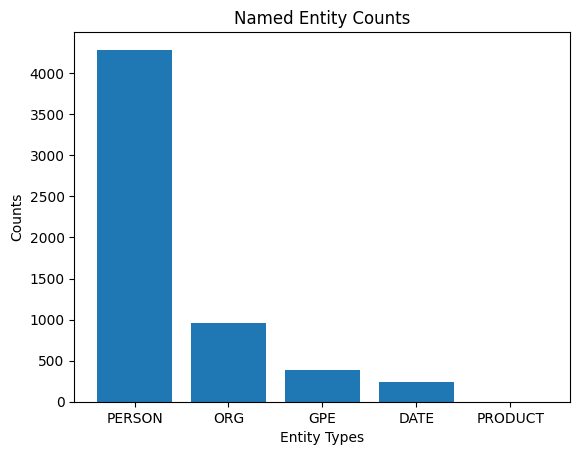

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Read the CSV file and ensure column names are correct
df = pd.read_csv("Peng.movie_review_cleaned.csv")
df.columns = df.columns.str.strip()  # Remove leading and trailing spaces from column names

# Print column names to confirm
print(df.columns)

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Get the cleaned review data
clean_reviews = df['Cleaned_Review']

# 1. Parts of Speech (POS) Tagging
pos_counts = {'N': 0, 'V': 0, 'Adj': 0, 'Adv': 0}

for review in clean_reviews:
    doc = nlp(review)
    for token in doc:
        if token.pos_ == 'NOUN':
            pos_counts['N'] += 1
        elif token.pos_ == 'VERB':
            pos_counts['V'] += 1
        elif token.pos_ == 'ADJ':
            pos_counts['Adj'] += 1
        elif token.pos_ == 'ADV':
            pos_counts['Adv'] += 1

print("Parts of Speech counts:")
print(pos_counts)

# 2. Constituency Parsing and Dependency Parsing
example_sentence = clean_reviews.iloc[0]  # Choose the first review as an example
doc = nlp(example_sentence)

# Print the dependency tree of the sentence
print("\nDependency Parsing Tree:")
for token in doc:
    print(f"{token.text} -> {token.dep_} -> {token.head.text}")

# Print the constituency parsing tree (spaCy does not directly provide constituency parsing, but other libraries can be used)
# The following visualizes the dependency parsing tree
from spacy import displacy
displacy.render(doc, style="dep", jupyter=True)

# 3. Named Entity Recognition (NER)
entities = {'PERSON': 0, 'ORG': 0, 'GPE': 0, 'DATE': 0, 'PRODUCT': 0}
for review in clean_reviews:
    doc = nlp(review)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            entities['PERSON'] += 1
        elif ent.label_ == 'ORG':
            entities['ORG'] += 1
        elif ent.label_ == 'GPE':  # Geopolitical Entity (location)
            entities['GPE'] += 1
        elif ent.label_ == 'DATE':
            entities['DATE'] += 1
        elif ent.label_ == 'PRODUCT':
            entities['PRODUCT'] += 1

print("\nNamed Entity Recognition counts:")
print(entities)

# Visualize the frequency of named entities
labels = list(entities.keys())
values = list(entities.values())

# Use matplotlib to plot a bar chart
plt.bar(labels, values)
plt.xlabel('Entity Types')
plt.ylabel('Counts')
plt.title('Named Entity Counts')
plt.show()


# **Following Questions must answer using AI assitance**

#Question 4 (20 points).

Q4. (PART-1)
Web scraping data from the GitHub Marketplace to gather details about popular actions. Using Python, the process begins by sending HTTP requests to multiple pages of the marketplace (1000 products), handling pagination through dynamic page numbers. The key details extracted include the product name, a short description, and the URL.

 The extracted data is stored in a structured CSV format with columns for product name, description, URL, and page number. A time delay is introduced between requests to avoid server overload. ChatGPT can assist by helping with the parsing of HTML, error handling, and generating reports based on the data collected.

 The goal is to complete the scraping within a specified time limit, ensuring that the process is efficient and adheres to GitHub’s usage guidelines.

(PART -2)

1.   **Preprocess Data**: Clean the text by tokenizing, removing stopwords, and converting to lowercase.

2. Perform **Data Quality** operations.


Preprocessing:
Preprocessing involves cleaning the text by removing noise such as special characters, HTML tags, and unnecessary whitespace. It also includes tasks like tokenization, stopword removal, and lemmatization to standardize the text for analysis.

Data Quality:
Data quality checks ensure completeness, consistency, and accuracy by verifying that all required columns are filled and formatted correctly. Additionally, it involves identifying and removing duplicates, handling missing values, and ensuring the data reflects the true content accurately.


Github MarketPlace page:
https://github.com/marketplace?type=actions

In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to clean and preprocess text data
def clean_text(text):
    # Remove special characters, HTML tags, and unnecessary whitespace
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

# Load the data from CSV
def preprocess_data(filename="github_marketplace.csv"):
    # Read the CSV into a pandas DataFrame
    df = pd.read_csv(filename)

    # Preprocess product descriptions
    df['Cleaned Description'] = df['Description'].apply(clean_text)

    # Data Quality Operations:
    # Check for missing values
    if df.isnull().values.any():
        print("Missing values detected. Filling missing values...")
        df = df.fillna('Unknown')  # Fill missing values with 'Unknown'

    # Remove duplicates based on 'Product Name'
    df = df.drop_duplicates(subset=['Product Name'])

    print(f"Data Quality Check Complete: {df.shape[0]} rows after cleaning.")

    return df

# Save preprocessed data to a new CSV file
def save_preprocessed_data(df, filename="preprocessed_github_marketplace.csv"):
    df.to_csv(filename, index=False)
    print(f"Preprocessed data saved to {filename}")

# Main function for preprocessing
def main_preprocess():
    df = preprocess_data()
    save_preprocessed_data(df)

if __name__ == "__main__":
    main_preprocess()






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Data Quality Check Complete: 0 rows after cleaning.
Preprocessed data saved to preprocessed_github_marketplace.csv


#Question 5 (20 points)

PART 1:
Web Scrape  tweets from Twitter using the Tweepy API, specifically targeting hashtags related to subtopics (machine learning or artificial intelligence.)
The extracted data includes the tweet ID, username, and text.

Part 2:
Perform data cleaning procedures

A final data quality check ensures the completeness and consistency of the dataset. The cleaned data is then saved into a CSV file for further analysis.


**Note**

1.   Follow tutorials provided in canvas to obtain api keys. Use ChatGPT to get the code. Make sure the file is downloaded and saved.
2.   Make sure you divide GPT code as shown in tutorials, dont make multiple requestes.


In [1]:
import tweepy
import pandas as pd

# Set up Twitter API authentication
bearer_token = "AAAAAAAAAAAAAAAAAAAAABVzzQEAAAAAbwewUCtMFyxNevRoqb1P7Ed0ZG8%3D6XA26wUz2Cmis1u0r1RTVwUne2WtBjptPexWaRU4IDZex92YlK"

# Create API client
client = tweepy.Client(bearer_token=bearer_token)

# Set search query
query = "machine learning OR artificial intelligence"

# Get relevant tweets
tweets = client.search_recent_tweets(query=query, max_results=100)

# Extract tweet data
tweet_data = []
for tweet in tweets.data:
    tweet_data.append({
        "tweet_id": tweet.id,
        "username": tweet.author_id,  # v2 gets author id
        "text": tweet.text
    })

# Store data in DataFrame
df = pd.DataFrame(tweet_data)

# Save data to a CSV file
df.to_csv("tweets_data.csv", index=False)

print("Successfully saved tweet data to CSV.")


TooManyRequests: 429 Too Many Requests
Usage cap exceeded: Monthly product cap

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

# Write your response below
Fill out survey and provide your valuable feedback.

https://docs.google.com/forms/d/e/1FAIpQLSd_ObuA3iNoL7Az_C-2NOfHodfKCfDzHZtGRfIker6WyZqTtA/viewform?usp=dialog